<a href="https://colab.research.google.com/github/Dr-Mohamed-Elkholy/Machine-Learning-Projects/blob/main/EEG_128_Resting_CHANNEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Defining

1 - download the dataset

In [ ]:
! wget https://reshare.ukdataservice.ac.uk/854301/4/854301_EEG_128Channels_Resting_Lanzhou_2015.zip

--2022-11-27 15:46:40--  https://reshare.ukdataservice.ac.uk/854301/4/854301_EEG_128Channels_Resting_Lanzhou_2015.zip
Resolving reshare.ukdataservice.ac.uk (reshare.ukdataservice.ac.uk)... 155.245.130.19
Connecting to reshare.ukdataservice.ac.uk (reshare.ukdataservice.ac.uk)|155.245.130.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2276623008 (2.1G) [application/zip]
Saving to: ‘854301_EEG_128Channels_Resting_Lanzhou_2015.zip’

854301_EEG_128Chann 100%[===================>]   2.12G  32.4MB/s    in 68s     

2022-11-27 15:47:48 (32.1 MB/s) - ‘854301_EEG_128Channels_Resting_Lanzhou_2015.zip’ saved [2276623008/2276623008]



2 - unzip the data

In [ ]:
! unzip /content/854301_EEG_128Channels_Resting_Lanzhou_2015.zip

In [ ]:
# define the directory
directory = '/content/EEG_128channels_resting_lanzhou_2015'
# import library for getting file from directory
import os
all_files = os.listdir(directory)
# the number of files in the directory.
# we will exculde the last file because it is not an eeg file
print(len(all_files) - 1)

53


In [ ]:
# last file is excel file that contain infos about the participants
data_file_path = os.path.join(directory , 'subjects_information_EEG_128channels_resting_lanzhou_2015.xlsx')
# import pandas library to read the file
import pandas as pd
data_table = pd.read_excel(data_file_path)

3 - Explore the data

In [ ]:
data_table.head(10)

,subject id,type,age,gender,education（years）,PHQ-9,CTQ-SF,LES,SSRS,GAD-7,PSQI,Unnamed: 11,Unnamed: 12
0,2010002,MDD,18,F,12,23,77,-143,31,18,12,NaN,abbreviation
1,2010004,MDD,25,F,19,12,53,-44,38,13,11,NaN,MDD = Major Depressive Disorder
2,2010005,MDD,20,M,16,19,49,-3,28,11,5,NaN,HC = Healthy Control
3,2010006,MDD,42,M,16,16,59,-30,40,12,9,NaN,PHQ-9 = Patient Health Questionnaire
4,2010008,MDD,42,M,12,17,66,-71,44,18,13,NaN,CTQ-SF = Childhood Trauma Questionnaire
5,2010010,MDD,34,M,6,19,50,0,32,20,21,NaN,LES = Life Event Scale
6,2010011,MDD,45,M,9,24,47,0,26,13,15,NaN,SSRS = Social Support Research Scale
7,2010012,MDD,21,F,16,22,38,-2,41,14,16,NaN,GAD-7 = Generalized Anxiety Disorder
8,2010013,MDD,21,F,16,11,50,-165,29,7,11,NaN,PSQI = Pittsburgh Sleep Quality Index
9,2010015,MDD,26,M,16,14,51,-20,35,10,4,NaN,remarks


the last tow columns are for demonstrations

In [ ]:
# 1-  age
data_table.age.describe()

count    53.000000
mean     31.188679
std       9.627798
min      16.000000
25%      23.000000
50%      29.000000
75%      40.000000
max      52.000000
Name: age, dtype: float64

In [ ]:
# 2-  type
print(data_table.type.value_counts())

HC     29
MDD    24
Name: type, dtype: int64


In [ ]:
# gender
print(data_table.gender.value_counts())

M    33
F    20
Name: gender, dtype: int64


In [ ]:
# education（years）
data_table['education（years）'].describe()

count    53.000000
mean     14.735849
std       3.329073
min       6.000000
25%      12.000000
50%      16.000000
75%      16.000000
max      19.000000
Name: education（years）, dtype: float64

we will compute the correlation between features

In [ ]:
data_table_ = data_table.replace({"gender" : {"F" : 0 , "M" : 1} ,'type' : {"MDD" : 1 , "HC" : 0}}).drop(['subject id'] , axis = 1)
data_table_.corr()['type']

type                1.000000
age                -0.029923
gender             -0.151971
education（years）   -0.409915
PHQ-9               0.946939
CTQ-SF              0.491346
LES                -0.375971
SSRS               -0.562198
GAD-7               0.843325
PSQI                0.795434
Unnamed: 11              NaN
Name: type, dtype: float64

4 - EEG data exploration

This image show us the location of electrodes on the head

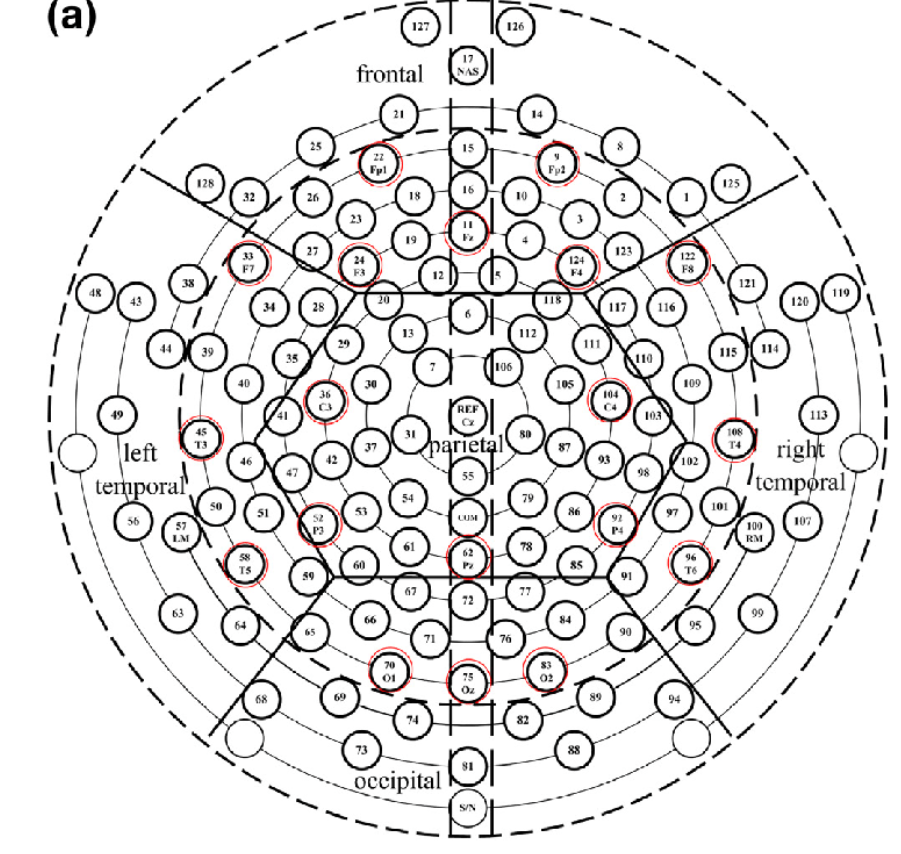

In [ ]:
# we will remove this file from the directory because it is not EEG file
all_files.remove('subjects_information_EEG_128channels_resting_lanzhou_2015.xlsx')

we will import the main library for
tackling the data

In [ ]:
! pip install mne
import mne
import scipy.io

In [ ]:
# this function is for reading the files and convert them to mne files
def read_matfile(path) :
  # The file is consist from the eeg signals , sampling rate and impedance data
  eeg_file = scipy.io.loadmat(path)
  eeg_data = eeg_file[list(eeg_file.keys())[3]]
  sampling_rate = eeg_file[list(eeg_file.keys())[4]]
  ## setting file info
  ch_names = ['E'+str(i) for i in range(1,129)]
  ch_types = ["eeg"] * len(ch_names)
  info = mne.create_info(ch_names=ch_names, sfreq=int(sampling_rate[0][0]), ch_types=ch_types,
                       )
  ### we will define the montage which is the location of the electordes
  info.set_montage('GSN-HydroCel-128')
  # reading the file
  # we will exclude the last channel because it is reference channel
  data = mne.io.RawArray(eeg_data[:-1],info )
  return data

we will start with the first file then we will do the same thing for all the rest of files

In [ ]:
index_of_file = 0
eeg_file = read_matfile(os.path.join(directory,all_files[index_of_file]))
print("Done!")

Creating RawArray with float64 data, n_channels=128, n_times=75251
    Range : 0 ... 75250 =      0.000 ...   301.000 secs
Ready.
Done!


In [ ]:
# print data information
print(eeg_file.info)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 128 EEG
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 250.0 Hz
>


In [ ]:
# the shape of the data
print("The shape of eeg_data is : " , eeg_file.get_data().shape)

the shape of eeg_data is :  (128, 75251)


so we see that the data has 128 channels and 75 thousands timestamp .
Dont forget that we droped the last channel because it was reference channel

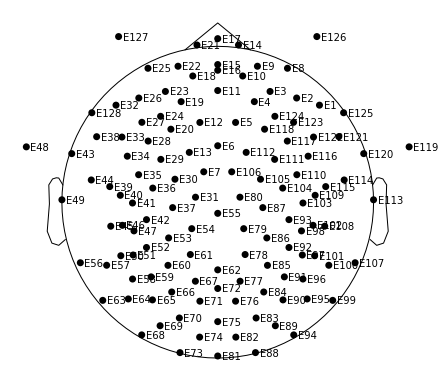

In [ ]:
# plot elecrodes location
eeg_file.plot_sensors(ch_type ='eeg',show_names=True)
plt.show()

visulzie power spectrum density (psd)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)


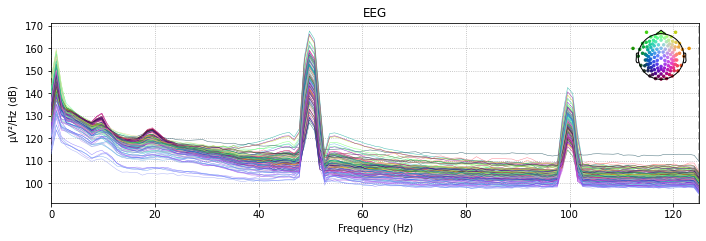

In [ ]:
eeg_file.plot_psd()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


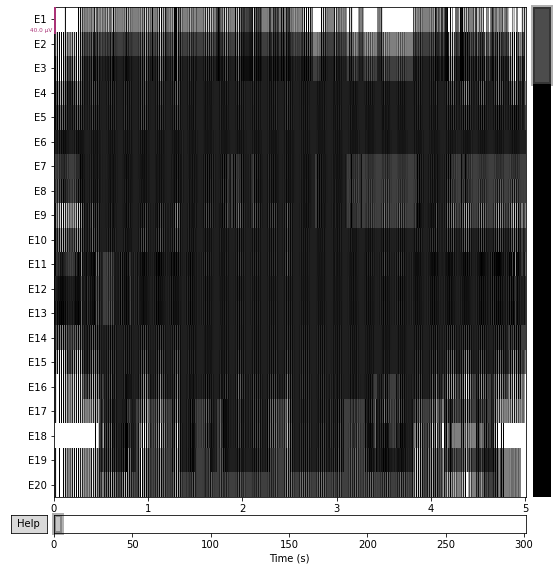

In [ ]:
# we will plot first 20 channels from the data now
import matplotlib.pyplot as plt
eeg_file.plot(duration=5,n_channels=20)
plt.show()

we see that the data is too messy and we need to preprocess it it

# Data preprocessing

1 - we wont set a refrenced electroed to the data becuase the data has a refrenced electrode

2 - filtering : we will filter the data between 0.5 and 40 hz so this procedure will
supress muscle activity and power line noise since most of these
artifacts power is concentrated in higher frequencies

In [ ]:
eeg_file.load_data()
filtered = eeg_file.copy().filter(l_freq=1 , h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    0.5s finished


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


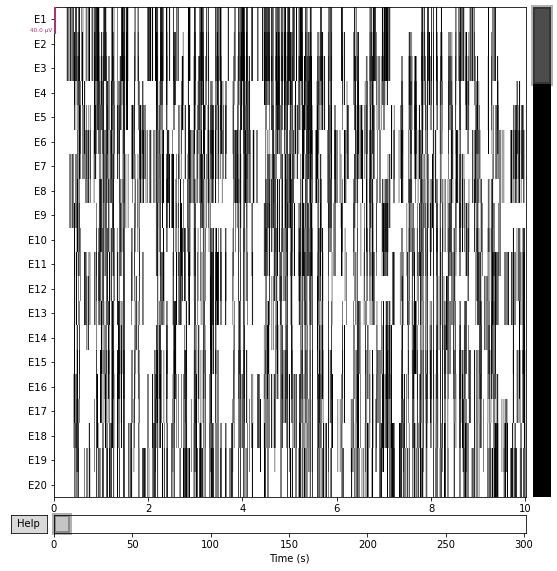

In [ ]:
# we will plot the data after filtering
filtered.plot(duration=10,n_channels=20)
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)


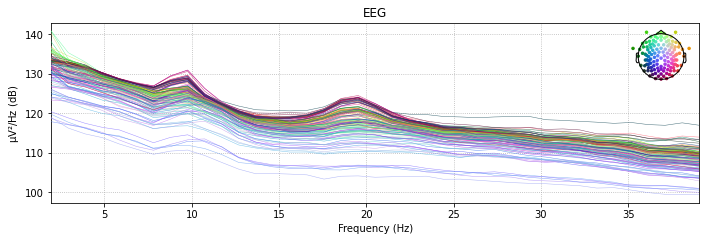

In [ ]:
filtered.plot_psd(fmin= 1 , fmax = 40)
plt.show()

3 - Data denoising and removing artifacts using independent componenet analysis
We will only select 50 components from the data.
We will use fastica method

In [ ]:
ica = mne.preprocessing.ICA(n_components =50)

In [ ]:
# we will fit the EEG data to the ica
ica.fit(eeg_file)

Fitting ICA to data using 128 channels (please be patient, this may take a while)


<ipython-input-51-15cc298e0ec4>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(eeg_file)


Selecting by number: 50 components


<ipython-input-51-15cc298e0ec4>:2: RuntimeWarning: Using n_components=50 (resulting in n_components_=50) may lead to an unstable mixing matrix estimation because the ratio between the largest (16) and smallest (1.4e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 48
  ica.fit(eeg_file)


Fitting ICA took 11.9s.


Method,fastica
Fit,43 iterations on raw data (75251 samples)
ICA components,50
Available PCA components,128
Channel types,eeg
ICA components marked for exclusion,—


we will visulize the topomap and components  to decide which componenet is an artifact or not

Creating RawArray with float64 data, n_channels=5, n_times=75251
    Range : 0 ... 75250 =      0.000 ...   301.000 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


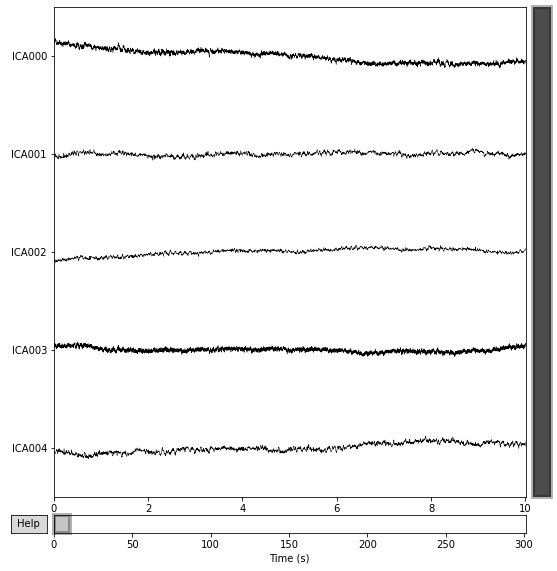

In [ ]:
ica.plot_sources(eeg_file,start=0 , stop =10, picks=[i for i in range(5)])
plt.show()

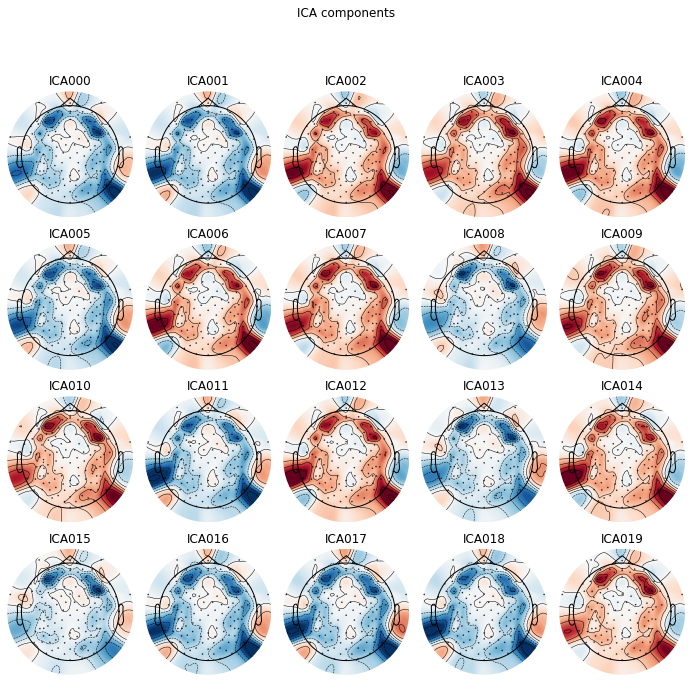

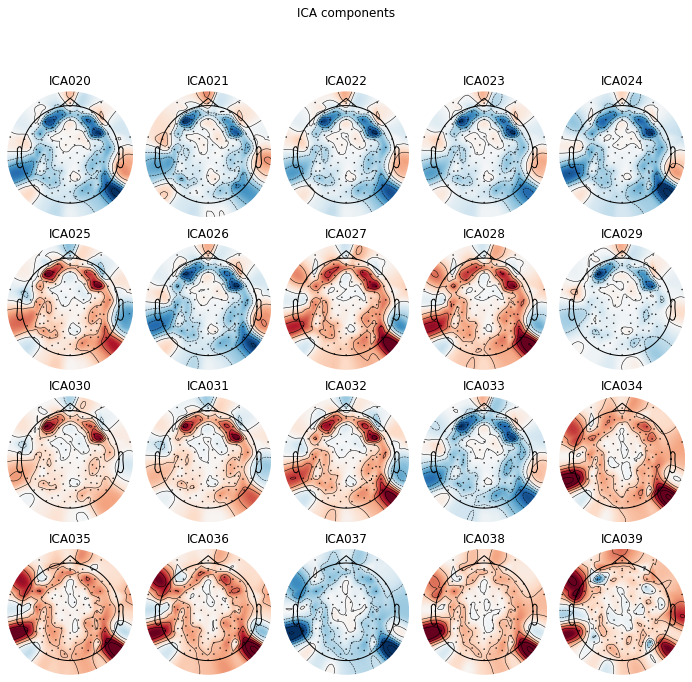

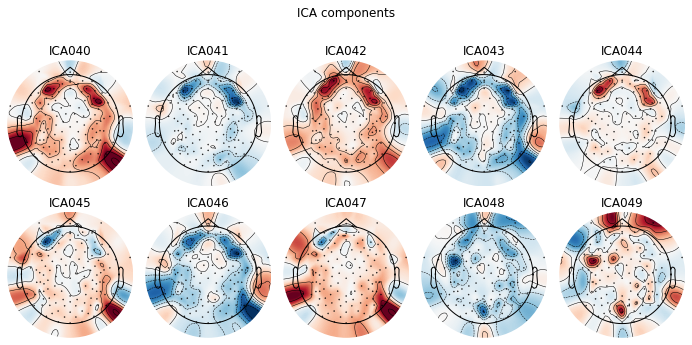

In [ ]:
ica.plot_components();

we will select the commponents that we will exclude from the data.
Then we will apply ica to the data

In [ ]:
excluded_commponents = [0 , 8 , 10 ,14 ,15 ,19 , 25 , 46 ,48 ,49]
ica.exclude = excluded_commponents
new_eeg_file = ica.apply(eeg_file.copy() , exclude = ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (50 components)
    Zeroing out 10 ICA components
    Projecting back using 128 PCA components


we found that this channels are most bad and artifact containing channels in the data
respect to the order of files in the list

excluded0 = [0 , 8 , 10 ,14 ,15 ,19 , 25 , 46 ,48 ,49]
excluded1 = [5 ,6,7,8,9,10,11 ,13 , 15,16,17 , 22,23 ,32,33 ,35,36 , 37 , 45,48,49 ]
excluded2 = [4  , 10  , 14 , 23,24 , 26 ,  34 , 38, 41 , 44 ,49 ]
excluded3 = [4  , 7 , 17 , 18 , 19 , 22 , 25, 31 ,32 , 33 ,38 , 42, 44 ,45 ]
excluded4 = [4  ,8 , 13, 16, 27, 40 , 41 ,43  ]
excluded5 = [1,4  ,9, 12 , 18,19 ,23 ,27 ,  33 , 36,37 ,39 , 42 ,44 ,46 ]
excluded6 = [2,3,4,6,7,8 , 15 , 16,17 ,20 , 22 , 26,32 ,43 , 46 ]
excluded7 = [7 ,10 ,12 ,16 , 19 ,20 ,24 ,28 ,30 ,32,33 ,40 , 43 ,49 , 45 ,44 ]
excluded8 = [11 , 13 , 16 ,18,19 ,29 ,30 , 32 ,37,38 ,39  ]
excluded9 = [1,2,3 ,6 , 14 ,16,17,20,21, 23,24 ,25 ,37,39 ]
excluded10 = [2 , 9, 19 , 34, 47 ,48   ]
excluded11 = [19 ,24 ,30 ,  ]
excluded12 = [0,2 ,8 , 17  , 20 ,26, 30 ,33, 39 , ]
excluded13 = [15, 17 , 27 , 40 ,46]
excluded14 = [8, 10 ,23 ,24 ,25,26,27 ,31, 33 ,41 ,43,44 ,46,48]
excluded15 = [0,1 ,4, 11, 27, 48]
excluded16 = [11, 18,19 ,29,31,33 ,48]
excluded17 = [3 , 5, 7 ,12 ,39 ,43,44 ]
excluded18 = [0,1,2, 13,31,32,33, 34 , 35, 39 ,40 ,  ]
excluded19 = [0,2 , 7,12 ,18 , 22,24, 26, 30,31,32,40  ]
excluded20 = [5, 6, 12 ,18,19 ,22,23 ,24 ,25 ,33 ,44,45 ,48  ]
excluded21 = [8,9,18 , 26, 32,33 ,41 , 46 ]
excluded22 = [15,18 , 40 ,   ]
excluded23 = [ 16,17,18,32, 34 , 40 , 43, 45 ,47,48 ]
excluded24 = [ 7 ,10 ,35 , ]
excluded25 = [ 1 , 3 , 19 , 24 ,26 , 27 , 36 , 42 ,47 ,]
excluded26 = [0, 10 ,14 , 17 , 22 , 25, 29 ,33, 35 ]
excluded27 = [17,18 ,19 ,25, 28, 33, 40 ,46 ,]
excluded28 = [0,4 ,12, 14, 30 , 43 , 45 ,]
excluded29 = [0,1,3,4 ,7 ,8 ,10,11 , 14 ,21 ,25,26 ,27 ,34,39 ,47 ,43 ]
excluded30 = [4 ,5 ,8, 34 ,41 ,46 , ]
excluded31 = [4 , 8 ,20 , 23 ,31 ,40 , ]
excluded32 = [11 ,15,16 ,17 , 28 , 36 ,39 , 41 ,47 ,48]
excluded33 = [1,2,3,4 ,  28 , 49 ]
excluded34 = [ 4, 8 ,16 , 20 ,25 ,29 , 31 ,44 ,48 ]
excluded35 = [ 5 ,10 , 15 , 34 ,49]
excluded36 = [ 11 ,18 , 23,24 ,27,29 , 40 , 44 ]
excluded37 = [ 3 , 10,11 ,18 , 43 , 47]
excluded38 = [12,14 ,21 ,26 ,34 ,36 ,39 ,40 ,43 ,48]
excluded39 = [5,7 ,11 , 21 , ]
excluded40 = [2,3 , 7 ,12 , 15 ,23 ,40 ,47 ]
excluded41 = [2 , 7, 19 , 31 ,32 ,33,34 ,35 ,44 , ]
excluded42 = [4 ,8 ,25 ,30 , 33 ,42 ,44 ,47,48]
excluded43 = [3 ,5,7, 12,14 ,19 ,21 ,32 ,43, 44 ,47 ]
excluded44 = [16 , 23 ,25 ,30 , 39 , 43,44 ,46, 49]
excluded45 = [0,1,2,3 ,20,22 ,35 ,]
excluded46 = [ 3 ,7 ,11 ,29 ,30 , 36 ,41 ,43,44 ,46 ]
excluded47 = [5,7 , 8, 21 ,30 , 32 ,45 , ]
excluded48 = [0,1,2 , 6, 19 , 28,29, 31 ,48, 47 ]
excluded49 = [19 , 26 , 29 , 33 , 42 ,43 ,49 ,47  ]
excluded50 = [ 0 ,1 ,2 ,3 ,4 ,13 ,24 ,27 , 39 ,  ]
excluded51 = [ 1,2 ,11, 16 ,20 , 26,27 ,35 , ]
excluded52 = [ 4 ,6 ,16 ,20,21 ,30 , 33 ,42,43 ,48 , ]

# Data augmentation

we will split the data into equal epochs so
each epoch has same size . and overlap equal one between them .

In [ ]:
epochs = mne.make_fixed_length_epochs(new_eeg_file , duration = 60 ,overlap =1)

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
print('The new shape of the data : ', epochs.get_data().shape)
print('Now we have 5 samples from original one')

Using data from preloaded Raw for 5 events and 15000 original time points ...
The new shape of the data :  (5, 128, 15000)
Now we have 5 samples from original one


we will create directory to save files in

we will now save each epoch with subject id , subject type and epoch number in the file name.


In [ ]:
data = epochs.get_data()
subject_id = int(str(all_files[index_of_file])[1:8])
subject_type = data_table[data_table['subject id'] == subject_id]['type'].item() == 'MDD'
if subject_type :
  num = 1
else :
  num =0
for i , epoch in enumerate(data) :
   np.save(f'/content/data_after_preprocessing/{num}_{subject_id}_{i}' , epoch)

Using data from preloaded Raw for 5 events and 15000 original time points ...


we will do same thing to all the data

After finishing this to all the data we will.
we will read the all the files in the new directory .

In [ ]:
dir = '/content/data_after_preprocessing'
new_files = os.listdir(dir)
print(len(new_files))

6


In [ ]:
new_files

['0_2020013_4.npy',
 '0_2020013_1.npy',
 '0_2020013_0.npy',
 '0_2020013_2.npy',
 '.ipynb_checkpoints',
 '0_2020013_3.npy']

In [ ]:
def read_all_files() :
    x = []
    y = []
    ids = []
    if '.ipynb_checkpoints' in new_files :
      new_files.remove('.ipynb_checkpoints')
    for file in new_files :
      path = os.path.join(dir , file)
      data = np.load(path)
      type_ = int(file.split('_')[0])
      id_ = int(file.split('_')[1])
      x.append(data)
      y.append(type_)
      ids.append(id_)
    return (np.array(x) , np.array(y) , np.array(ids))
x , y , ids = read_all_files()

If you want data after augmentation go to this link :
https://drive.google.com/drive/folders/1YBpNT-65a5UgEpY6OeSr3VY265wGJ87Z?usp=sharing

# Features Extraction

we will use wavelet analysis method only to extract features from the data because we found that this is the best method .

##Walvelet Analysis

In [ ]:
import pywt
import os
import pandas as pd
import scipy.io as spio
import numpy as np

In [ ]:
WAVELET = "db6"
MAX_LEVEL = 5

In [ ]:
def calc_wavelet_energy(data_set):
  """
    Input : 1 * N vector
    Output: Float with the wavelet energy of the input vector,
    rounded to 3 decimal places.
  """
  # p_sqr = [i ** 2 for i in data_set]
  wavelet_energy = np.nansum(np.log2(np.square(data_set)))
  return round(wavelet_energy, 3)

In [ ]:
def calc_shannon_entropy(data_set):
        """
            Input : 1 * N vector
            Output: Float with the wavelet entropy of the input vector,
                    rounded to 3 decimal places.
        """
        # probability = [i ** 2 for i in data_set]
        probability = np.square(data_set)
        shannon_entropy = -np.nansum(probability * np.log2(probability))
        return round(shannon_entropy, 3)

In [ ]:
participant_trial = []
features_table = pd.DataFrame(columns=range(1280))
for file in final_data_x:
    data_df = pd.DataFrame(file)

    #print('data_df',data_df)
    M = data_df.shape[0]
    N = data_df.shape[1]
    # Feature extraction part of the module
    Entropy = []
    Energy = []
    for channel in data_df.iterrows():  # Iterating through the 62 channels
      dwt_bands = []
      data = channel[1]
      int_ent = []
      int_eng = []

      for band in range(MAX_LEVEL):
        (data, coeff_d) = pywt.dwt(data, WAVELET)
        dwt_bands.append(coeff_d)

      for band in range(len(dwt_bands)):  # DWT_bands = 23504, 11755
        int_ent.append(calc_shannon_entropy(dwt_bands[len(dwt_bands) - band - 1]))
        int_eng.append(calc_wavelet_energy(dwt_bands[len(dwt_bands) - band - 1]))

      Entropy.append(int_ent)
      Energy.append(int_eng)

    unroll_entropy = []
    unroll_energy = []
    '''
        Transforming 2D array into 1D vector of features and then
        combining the two 1D arrays.
    '''
    for i in range(len(Entropy)):
      for j in range(len(Entropy[0])):
        unroll_entropy.append(Entropy[i][j])
      #  print (unroll_entropy)
        unroll_energy.append(Energy[i][j])

    features = unroll_entropy + unroll_energy
    participant_trial.append(features)
    features_table.loc[len(features_table.index)] = features

In [ ]:
np.save('/content/features_Walvelet.npy', features_table) #'/content/drive/MyDrive/EEG/features_Walvelet.npy'

In [ ]:
features_Walvelet = np.load('/content/features_Walvelet.npy')

In [ ]:
features_Walvelet.shape

(265, 1280)

then we will collect all the data in one dataframe

In [ ]:
import pandas as pd
rest_128_data = pd.concat([ pd.DataFrame(features_Walvelet) ,pd.DataFrame(ids, columns = ['subject id']) ,
                           pd.DataFrame(y, columns = ['subject type'])] , axis = 1
                      )

In [ ]:
rest_128_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,subject id,subject type
0,-3852952.563,-7319762.140,-1293147.332,-550113.780,-6948.195,-2245665.785,-4702868.626,-835785.020,-247370.438,-251.900,...,11278.747,16279.292,-19617.880,3669.422,7157.814,9199.735,9587.431,-32689.319,2010023,1
1,-4267280.330,-8101198.355,-1588993.060,-918695.197,-1144.847,-2403085.478,-5049408.382,-1039487.011,-334464.694,1003.262,...,11160.852,17138.991,-16621.057,3709.883,7538.252,8755.079,9215.527,-32220.396,2010023,1


In [ ]:
rest_128_data.to_csv('rest_128_data.csv' , index= False)

# Feature Selection

to download extracted features from the link below :
https://drive.google.com/file/d/1pG5P5FEP2J1d0t9tRpEPzoKae_9RHFYO/view?usp=share_link

In [ ]:
! gdown --fuzzy https://drive.google.com/file/d/1pG5P5FEP2J1d0t9tRpEPzoKae_9RHFYO/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1pG5P5FEP2J1d0t9tRpEPzoKae_9RHFYO
To: /content/rest_128_data.csv
100% 3.55M/3.55M [00:00<00:00, 175MB/s]


In [ ]:
import pandas as pd
rest_128_data = pd.read_csv('/content/rest_128_data.csv')

In [ ]:
# Get the data from the table
x = rest_128_data.iloc[: , :-2].to_numpy().astype('float32')
print(x.shape)
y = rest_128_data.iloc[: , -1].to_numpy().astype('int')
print(y.shape)
ids = rest_128_data.iloc[: , -2].to_numpy().astype('int')
print(ids.shape)

(265, 1280)
(265,)
(265,)


feature selection using sequential feature selection method

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2  , random_state = 42)

In [ ]:
import sklearn.externals as joblib
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(knn  , k_features=214,
           forward=True,
           floating=True,
           verbose=2,
           scoring='accuracy',
           cv=5 ,
        )

sfs.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed:    4.2s finished

[2022-11-28 11:02:55] Features: 1/200 -- score: 0.7451827242524918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-11-28 11:02:59] Features: 2/200 -- score: 0.863233665559247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

SequentialFeatureSelector(estimator=KNeighborsClassifier(), floating=True,
                          k_features=200, scoring='accuracy', verbose=2)

In [ ]:
new_x_train4  = sfs.transform(y_train)
new_x_test4  = sfs.transform(y_test)

In [ ]:
new_x = sfs.transform(x)

In [ ]:
rest_128_data_after_selection = pd.concat([ pd.DataFrame(new_x) ,pd.DataFrame(ids, columns = ['subject id']) ,
                           pd.DataFrame(y, columns = ['subject type'])] , axis = 1
                      )

In [ ]:
rest_128_data_after_selection.to_csv('rest_128_data_after_selection.csv')

# Modeling

to download data after feature selection link below
https://drive.google.com/file/d/1-ZBpONQcU2oyEQCyH4RLSCR_I-lpkyPJ/view?usp=sharing

In [ ]:
! gdown --fuzzy https://drive.google.com/file/d/1-ZBpONQcU2oyEQCyH4RLSCR_I-lpkyPJ/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1-ZBpONQcU2oyEQCyH4RLSCR_I-lpkyPJ
To: /content/rest_128_data_after_selection.csv
100% 525k/525k [00:00<00:00, 54.5MB/s]


In [ ]:
rest_128_data_after_selection = pd.read_csv('/content/rest_128_data_after_selection.csv')

In [ ]:
rest_128_data_after_selection = rest_128_data_after_selection.drop(['Unnamed: 0'] , axis=1 , )
rest_128_data_after_selection.head(2)

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,subject id,subject type
0,3136.741,6424.962,9741.166,10943.912,-27851.656,3061.030,6142.313,9602.905,10291.143,-27832.887,...,1941.664,1661.890,2378.573,-777.422,3191.629,5780.198,-39200.004,2544.276,2010023,0
1,2522.554,4896.790,5277.613,4261.966,-30591.525,2096.736,3616.581,4599.032,2588.237,-32646.111,...,1889.978,225.882,-2505.917,-10527.414,3626.493,14867.003,-19466.250,2478.141,2010023,1


1 - without hyperparametters

In [ ]:
import matplotlib.cm as cm

# Scientific and vector computation for python
import numpy as np
np.random.seed(5)


# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()

from PIL import ImageFile, Image
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import KFold, cross_val_score, train_test_split, RepeatedStratifiedKFold, RepeatedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression,ElasticNet,BayesianRidge
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import  StackingCVRegressor



# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()
# from fastai.vision.all import *
# from fastbook import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torchsummary import summary
from torch.utils.data import Subset, DataLoader, ConcatDataset, Dataset



from sklearn.ensemble import RandomForestClassifier
import librosa # for music and audio analysis
import librosa.display # for audio visualization
import soundfile as sf # librosa fails when reading files on Kaggle.
from xgboost import XGBClassifier

In [ ]:
X = rest_128_data_after_selection.iloc[: , :-2].to_numpy().astype('float32')
y = rest_128_data_after_selection.iloc[: , -1].to_numpy().astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

In [ ]:
classifiers=[
['Decision Tree Classification     :',DecisionTreeClassifier()],
['Random Forest Classification     :',RandomForestClassifier()],
['Gradient Boosting Classification :', GradientBoostingClassifier()],
['XGBoost Classifier               :',XGBClassifier()],
['Ada Boosting Classification      :',AdaBoostClassifier()],
['Extra Tree Classification        :', ExtraTreesClassifier()],
['random forest : ' , RandomForestClassifier()] ,
['K-Neighbors Classification       :',KNeighborsClassifier()],
['Support Vector Classification    :',SVC()],
['Gausian Naive Bayes              :',GaussianNB()],
['Multi-layer Perceptron Classifier:',MLPClassifier(max_iter=100)],
['Logistic Regression              :', LogisticRegression()]]



performance_metrics = [
        ['accuracy_score  :', accuracy_score],
        ['f1_score        :', f1_score],
        ['precision_score :', precision_score],
        ['recall_score    :', recall_score],
        ['roc_auc_score   :', roc_auc_score]
        ]

q=accuracy_score

calc_acc=[]
print('--------------------------------------------------------------------')
for metrics_name, metrics in performance_metrics:
    for name,model in classifiers:
        model=model
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
        print( name,  metrics_name, metrics(y_test, predictions))
        calc_acc.append(metrics(y_test, predictions))
    print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Decision Tree Classification     : accuracy_score  : 0.9433962264150944
Random Forest Classification     : accuracy_score  : 0.9433962264150944
Gradient Boosting Classification : accuracy_score  : 0.9245283018867925
XGBoost Classifier               : accuracy_score  : 0.8867924528301887
Ada Boosting Classification      : accuracy_score  : 0.9433962264150944
Extra Tree Classification        : accuracy_score  : 0.9811320754716981
random forest :  accuracy_score  : 0.9622641509433962
K-Neighbors Classification       : accuracy_score  : 0.9245283018867925
Support Vector Classification    : accuracy_score  : 0.9622641509433962
Gausian Naive Bayes              : accuracy_score  : 0.660377358490566


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Multi-layer Perceptron Classifier: accuracy_score  : 0.9811320754716981
Logistic Regression              : accuracy_score  : 1.0
--------------------------------------------------------------------
Decision Tree Classification     : f1_score        : 0.8474576271186439
Random Forest Classification     : f1_score        : 0.9836065573770492
Gradient Boosting Classification : f1_score        : 0.9333333333333333
XGBoost Classifier               : f1_score        : 0.9032258064516129
Ada Boosting Classification      : f1_score        : 0.9538461538461539
Extra Tree Classification        : f1_score        : 1.0
random forest :  f1_score        : 0.9508196721311476
K-Neighbors Classification       : f1_score        : 0.9310344827586207
Support Vector Classification    : f1_score        : 0.9666666666666666
Gausian Naive Bayes              : f1_score        : 0.7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Multi-layer Perceptron Classifier: f1_score        : 1.0
Logistic Regression              : f1_score        : 1.0
--------------------------------------------------------------------
Decision Tree Classification     : precision_score : 0.96
Random Forest Classification     : precision_score : 1.0
Gradient Boosting Classification : precision_score : 0.9655172413793104
XGBoost Classifier               : precision_score : 0.9032258064516129
Ada Boosting Classification      : precision_score : 0.9117647058823529
Extra Tree Classification        : precision_score : 1.0
random forest :  precision_score : 0.967741935483871
K-Neighbors Classification       : precision_score : 1.0
Support Vector Classification    : precision_score : 1.0
Gausian Naive Bayes              : precision_score : 0.7241379310344828


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Multi-layer Perceptron Classifier: precision_score : 1.0
Logistic Regression              : precision_score : 1.0
--------------------------------------------------------------------
Decision Tree Classification     : recall_score    : 0.8387096774193549
Random Forest Classification     : recall_score    : 0.967741935483871
Gradient Boosting Classification : recall_score    : 0.9032258064516129
XGBoost Classifier               : recall_score    : 0.9032258064516129
Ada Boosting Classification      : recall_score    : 1.0
Extra Tree Classification        : recall_score    : 1.0
random forest :  recall_score    : 0.967741935483871
K-Neighbors Classification       : recall_score    : 0.8709677419354839
Support Vector Classification    : recall_score    : 0.9354838709677419
Gausian Naive Bayes              : recall_score    : 0.6774193548387096


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Multi-layer Perceptron Classifier: recall_score    : 1.0
Logistic Regression              : recall_score    : 1.0
--------------------------------------------------------------------
Decision Tree Classification     : roc_auc_score   : 0.9222873900293255
Random Forest Classification     : roc_auc_score   : 0.9772727272727273
Gradient Boosting Classification : roc_auc_score   : 0.9288856304985338
XGBoost Classifier               : roc_auc_score   : 0.8834310850439883
Ada Boosting Classification      : roc_auc_score   : 0.9318181818181819
Extra Tree Classification        : roc_auc_score   : 1.0
random forest :  roc_auc_score   : 0.9838709677419355
K-Neighbors Classification       : roc_auc_score   : 0.935483870967742
Support Vector Classification    : roc_auc_score   : 0.967741935483871
Gausian Naive Bayes              : roc_auc_score   : 0.656891495601173
Multi-layer Perceptron Classifier: roc_auc_score   : 1.0
Logistic Regression              : roc_auc_score   : 1.0
-------------------

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


we found that Extra Tree Classification has the hightest accuracy
from all classifiers

some hypertuning

In [ ]:
extra_class = ExtraTreesClassifier()
param_grid ={
  'n_estimators' : [3,10,30] , 'max_features'  : [2,4,6,8] , 'bootstrap' : [False , True]
}
extra_search = GridSearchCV(extra_class
                    , param_grid , cv=8  )
extra_search.fit(X_train_scaled , y_train)

GridSearchCV(cv=8, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [False, True],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [ ]:
extra_search.best_estimator_.score(X_test_scaled , y_test)

0.9622641509433962

In [ ]:
extra_search.best_estimator_.score(X_train_scaled , y_train)

1.0

deep learning

In [ ]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
model = keras.Sequential([
 keras.Input((214,)),
  keras.layers.Dense(214 , activation = 'relu'),
 layers.Dropout(0.1),
 layers.BatchNormalization() ,
 keras.layers.Dense(200 , activation = 'relu'),
 layers.Dropout(0.1),
 layers.BatchNormalization() ,
keras.layers.Dense(200 , activation = 'relu'),
 layers.Dropout(0.1),
 layers.BatchNormalization(),
 keras.layers.Dense(200 , activation = 'relu'),
 layers.Dropout(0.1),
 layers.BatchNormalization(),
 keras.layers.Dense(1 , activation = 'sigmoid')

])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001) , loss='binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 214)               46010     
                                                                 
 dropout_37 (Dropout)        (None, 214)               0         
                                                                 
 batch_normalization_46 (Bat  (None, 214)              856       
 chNormalization)                                                
                                                                 
 dense_59 (Dense)            (None, 200)               43000     
                                                                 
 dropout_38 (Dropout)        (None, 200)               0         
                                                                 
 batch_normalization_47 (Bat  (None, 200)              800       
 chNormalization)                                    

In [ ]:
class LR_ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(LR_ASK, self).__init__()
        self.model=model
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        self.lowest_vloss=np.inf
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.best_epoch=1


    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0:
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to')
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')
        self.start_time= time.time() # set the time at which training started

    def on_train_end(self, logs=None):   # runs at the end of training
        print('loading model with weights from epoch ', self.best_epoch)
        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        if v_loss< self.lowest_vloss:
            self.lowest_vloss=v_loss
            self.best_weights=self.model.get_weights() # set best weights to model's initial weights
            self.best_epoch=epoch + 1
            print (f'\n validation loss of {v_loss:7.4f} is below lowest loss, saving weights from epoch {str(epoch + 1):3s} as best weights')
        else:
            print (f'\n validation loss of {v_loss:7.4f} is above lowest loss of {self.lowest_vloss:7.4f} keeping weights from epoch {str(self.best_epoch)} as best weights')

        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()

                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)
                        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                        print(f'current LR is  {lr:7.5f}  hit enter to keep  this LR or enter a new LR')
                        ans=input(' ')
                        if ans =='':
                            print (f'keeping current LR of {lr:7.5f}')
                        else:
                            new_lr=float(ans)
                            tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                            print(' changing LR to ', ans)

In [ ]:
from tensorflow import keras
import time
epochs=10000
ask_epoch=200
ask=LR_ASK(model, epochs,  ask_epoch)
callbacks=[ask]

In [ ]:
history = model.fit(X_train_scaled , y_train ,validation_data=(X_test_scaled , y_test) , epochs = 3000,verbose=2 , callbacks = callbacks)

Training will proceed until epoch 200  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/3000

 validation loss of  0.6447 is above lowest loss of  0.0005 keeping weights from epoch 154 as best weights
7/7 - 12s - loss: 0.7179 - accuracy: 0.5943 - val_loss: 0.6447 - val_accuracy: 0.6415 - 12s/epoch - 2s/step
Epoch 2/3000

 validation loss of  0.5652 is above lowest loss of  0.0005 keeping weights from epoch 154 as best weights
7/7 - 0s - loss: 0.3683 - accuracy: 0.8302 - val_loss: 0.5652 - val_accuracy: 0.7736 - 71ms/epoch - 10ms/step
Epoch 3/3000

 validation loss of  0.5284 is above lowest loss of  0.0005 keeping weights from epoch 154 as best weights
7/7 - 0s - loss: 0.2563 - accuracy: 0.9151 - val_loss: 0.5284 - val_accuracy: 0.8113 - 75ms/epoch - 11ms/step
Epoch 4/3000

 validation loss of  0.4516 is above lowest loss of  0.0005 keeping weights from epoch 154 as best weights
7/7 - 0s - loss: 0.1896 -

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_scaled , y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000


[0.0029001336079090834, 1.0]

we found that this network achieve best accuracy

In [ ]:
model.save('rest_128_model.h5')